In [1]:
import pandas as pd
import glob
import re

# 1) Grab all matching files in the current directory (adjust the path/pattern as needed)
file_list = glob.glob("/Users/r/Desktop/Russell1000 stock data/feature/equity*_feature.parquet")

# 2) A helper function to extract the 4-digit year from the filename
def extract_year(filename):
    match = re.search(r"equity(\d{4})_feature\.parquet", filename)
    return int(match.group(1)) if match else 9999  # fallback if no match

# 3) Sort the file list by year
file_list.sort(key=extract_year)

# 4) Read and concatenate them in order
df_list = []
for f in file_list:
    temp_df = pd.read_parquet(f)
    df_list.append(temp_df)

filtered_df = pd.concat(df_list, ignore_index=True)
filtered_df = filtered_df[filtered_df['date'] != pd.Timestamp('2025-02-13')]
filtered_df

,date,ticker,open,high,low,close,volume,vwap,previous_returns,alpha001,...,alpha101,alpha1,alpha2,alpha4,alpha5,alpha6,alpha7,alpha8,future_log_ret,ret
0,2005-07-01,BBG000BKKMZ3,31.9000,32.0600,31.7500,31.9000,1093800.0,31.8960,0.003140,-0.623414,...,0.413276,0.215127,0.054160,-0.453414,0.551055,-0.813625,-0.131537,0.595718,0.011222,0.538292
1,2005-07-01,BBG000BNBDC2,55.7200,55.9800,55.2100,55.4200,2667600.0,55.5785,-0.005219,-0.942453,...,-0.248948,-0.002498,0.360651,-0.479099,0.286497,0.121238,0.188000,0.323938,0.010464,0.650046
2,2005-07-01,BBG000FRVHB9,26.4043,26.6233,26.4043,26.5795,663700.0,26.4915,0.004956,-0.578160,...,1.151883,0.316345,0.290464,0.867161,1.518402,-0.502087,0.446935,0.510970,0.017899,1.129795
3,2005-07-01,BBG000BS0N59,25.7636,25.8182,25.5818,25.7364,32316.0,25.7191,0.000707,1.174484,...,0.325907,-0.195278,-0.016784,-0.577433,0.235538,-0.533842,-0.342238,0.398487,0.006370,0.324680
4,2005-07-01,BBG000BVMGF2,60.0100,60.2400,59.6100,59.8500,2232600.0,59.8779,0.001672,-1.971223,...,-0.483446,0.116032,0.313337,-0.509887,0.413199,0.169326,1.026303,0.574887,0.019685,1.515875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857149,2025-02-12,BBG01K9HZH92,11.0000,11.1200,10.8900,10.9800,2912671.0,10.9766,-0.012670,-1.297014,...,0.194614,0.220329,0.470135,2.893268,-0.124685,-0.047538,-0.991443,0.299580,-0.001815,-0.067060
4857150,2025-02-12,BBG000BB29X4,123.5600,124.5450,122.8500,124.1900,1340132.0,123.9574,-0.005621,0.495607,...,0.495475,-0.177721,0.408391,-0.217776,-0.019024,-0.660212,-0.300627,0.119700,0.028292,1.559071
4857151,2025-02-12,BBG0059FN811,173.7600,177.8800,173.0694,177.7400,784815.0,177.0887,0.006661,1.824880,...,1.530917,-0.396650,-1.050231,-0.203483,-2.962027,-1.506095,-0.935379,-1.634710,0.000478,0.021918
4857152,2025-02-12,BBG01K9KJ3B1,11.3000,11.4064,11.2700,11.3500,964043.0,11.3349,-0.002640,-1.518569,...,1.562090,0.040916,0.124311,-0.151208,0.104953,-1.099946,-0.625420,0.409464,-0.003948,-0.144470


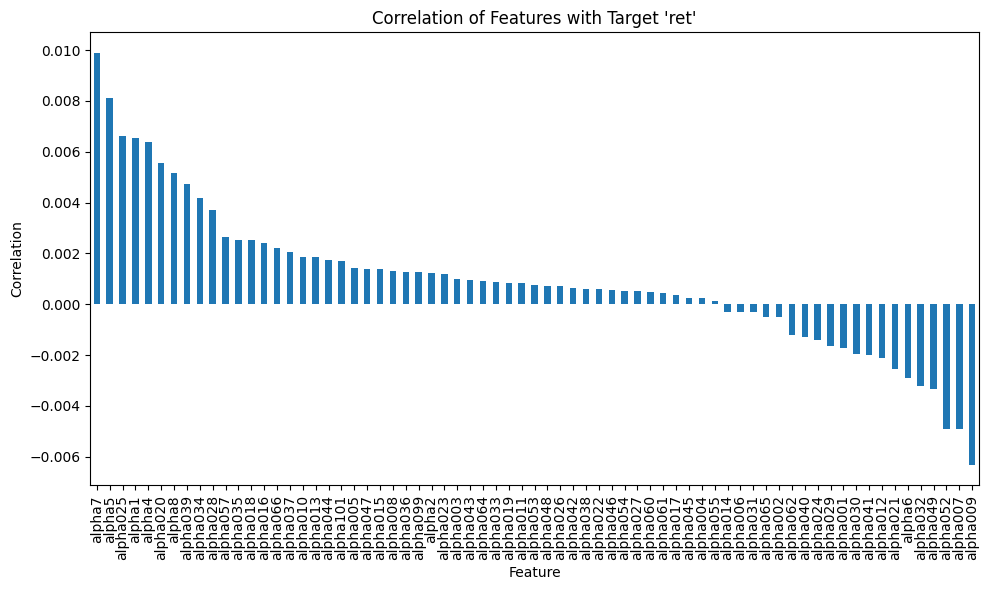

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
new_df = filtered_df
prev_ret_idx = new_df.columns.get_loc('previous_returns')

# Assuming the last 2 columns are target columns, get feature columns as those between previous_returns and the target columns.
feature_cols = new_df.columns[(prev_ret_idx + 1):-2]

# Set the target column (we use 'ret')
target_col = 'ret'

# Compute correlation of each feature with target
corrs = {}
for col in feature_cols:
    corrs[col] = new_df[col].corr(new_df[target_col])

# Convert to a pandas Series and sort by correlation descending
corr_series = pd.Series(corrs).sort_values(ascending=False)

# Plot the correlations in a bar chart
plt.figure(figsize=(10, 6))
corr_series.plot(kind='bar')
plt.title("Correlation of Features with Target 'ret'")
plt.xlabel("Feature")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge

# Replace NaN in 'ret' with 0
filtered_df['ret'] = filtered_df['ret'].fillna(0)

# Ensure 'date' is datetime and sort filtered_df by date
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df = filtered_df.sort_values('date').copy()

# Create a week identifier column based on the date (using ISO week period)
filtered_df['week'] = filtered_df['date'].dt.to_period('W')

# Add an empty column "pred" to store predictions
filtered_df['pred'] = np.nan

# Define columns to exclude from features
exclude_cols = [
    'date', 'ticker', 'open', 'high', 'low', 'close', 'volume', 'vwap',
    'previous_returns', 'future_log_ret', 'ret', 'week', 'pred'
]

# Define feature columns as all columns not in exclude_cols
features = [col for col in filtered_df.columns if col not in exclude_cols]

# Get the sorted unique weeks
unique_weeks = sorted(filtered_df['week'].unique())

# Walk-forward training:
#  - Use the first 48 weeks as the initial training period.
#  - Then, every step of 4 weeks, re-train on all prior weeks and predict for the next 4 weeks.
initial_train_weeks = 48  # number of weeks for initial training
step = 4  # walk-forward step

for i in range(initial_train_weeks, len(unique_weeks), step):
    # Training set: all weeks up to (but not including) the i-th week
    train_weeks = unique_weeks[:i]
    
    # Test set: weeks from i to i+3 (or until the end if fewer remain)
    test_weeks = unique_weeks[i : i + step]
    
    # Prepare training data
    train_data = filtered_df[filtered_df['week'].isin(train_weeks)]
    X_train = train_data[features]
    y_train = train_data['ret']
    
    # Prepare test data
    test_data = filtered_df[filtered_df['week'].isin(test_weeks)]
    X_test = test_data[features]
    
    # Train the Ridge model with alpha=1000
    model = Ridge(alpha=1000)
    model.fit(X_train, y_train)
    
    # Predict for the test set
    preds = model.predict(X_test)
    
    # Insert predictions into the "pred" column for these test rows
    filtered_df.loc[X_test.index, 'pred'] = preds

# Optionally, drop the 'week' column if not needed
filtered_df = filtered_df.drop(columns=['week'])
filtered_df

,date,ticker,open,high,low,close,volume,vwap,previous_returns,alpha001,...,alpha1,alpha2,alpha4,alpha5,alpha6,alpha7,alpha8,future_log_ret,ret,pred
0,2005-07-01,BBG000BKKMZ3,31.90,32.06,31.75,31.90,1093800.0,31.8960,0.003140,-0.623414,...,0.215127,0.054160,-0.453414,0.551055,-0.813625,-0.131537,0.595718,0.011222,0.538292,NaN
657,2005-07-01,BBG000BY33P5,25.25,25.38,24.76,24.89,4940486.0,24.9291,-0.011584,-0.629758,...,-0.101462,0.664911,-0.589574,0.623598,0.477624,0.383276,0.678321,0.004460,0.169690,NaN
658,2005-07-01,BBG000BCFQC3,33.77,33.97,33.48,33.96,433753.0,33.7915,0.011253,1.127271,...,-0.839558,-1.077593,1.365379,-0.873381,-0.943181,-2.028051,-0.667157,0.026184,1.548872,NaN
659,2005-07-01,BBG000BGMX22,26.58,26.85,26.58,26.76,562900.0,26.7452,0.009386,1.150148,...,0.877759,0.031619,-0.504925,0.963825,-0.420648,0.106813,0.391562,0.019469,1.053047,NaN
660,2005-07-01,BBG000BWMX63,46.72,47.40,46.72,47.37,132000.0,47.2325,0.014459,1.647698,...,0.268658,-2.544155,-0.353116,1.399347,-1.171040,-0.601818,-2.588623,-0.001905,-0.150914,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4856494,2025-02-12,BBG000C5HS04,70.60,72.45,70.33,72.26,10810858.0,71.8762,0.012814,1.731416,...,-0.114513,-0.925313,-0.240307,-1.476255,-0.837924,-0.860465,-1.048785,0.002735,0.096812,-0.006089
4856495,2025-02-12,BBG000BTHH16,76.69,77.39,75.71,75.99,1931674.0,76.2491,-0.017739,0.912381,...,1.078125,1.213385,0.780262,0.892535,1.289558,-0.284508,0.915851,0.004138,0.204034,-0.018345
4856496,2025-02-12,BBG000C5Z1S3,89.60,92.64,87.35,91.68,22874727.0,90.9835,-0.025841,-0.451684,...,-1.475191,-0.616290,-1.583095,-3.678688,-0.435615,-0.762795,-2.416597,0.029856,0.615497,-0.009654
4856483,2025-02-12,BBG001D0HB36,128.15,131.88,126.74,131.59,872036.0,130.3453,0.006404,1.694286,...,-0.349840,-1.191564,-0.216868,-1.305932,-0.697883,-1.126401,-1.376812,-0.011226,-0.262745,-0.015288


In [5]:
filtered_df = filtered_df.dropna(subset=['pred'])

In [6]:
import numpy as np
from sklearn.metrics import r2_score

# Compute Pearson correlation
corr = filtered_df['ret'].corr(filtered_df['pred'])

# Compute R-squared
r2 = r2_score(filtered_df['ret'], filtered_df['pred'])

print("Correlation between ret and pred:", corr)
print("R-squared:", r2)

Correlation between ret and pred: 0.010794459181116826
R-squared: -0.0012730855097351501


/var/folders/3h/f3f3r4gx24j1yt7f14dfr0cc0000gn/T/ipykernel_52563/94020761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'])
/var/folders/3h/f3f3r4gx24j1yt7f14dfr0cc0000gn/T/ipykernel_52563/94020761.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_corr = filtered_df.groupby('week').apply(lambda g: g['ret'].corr(g['pred']))


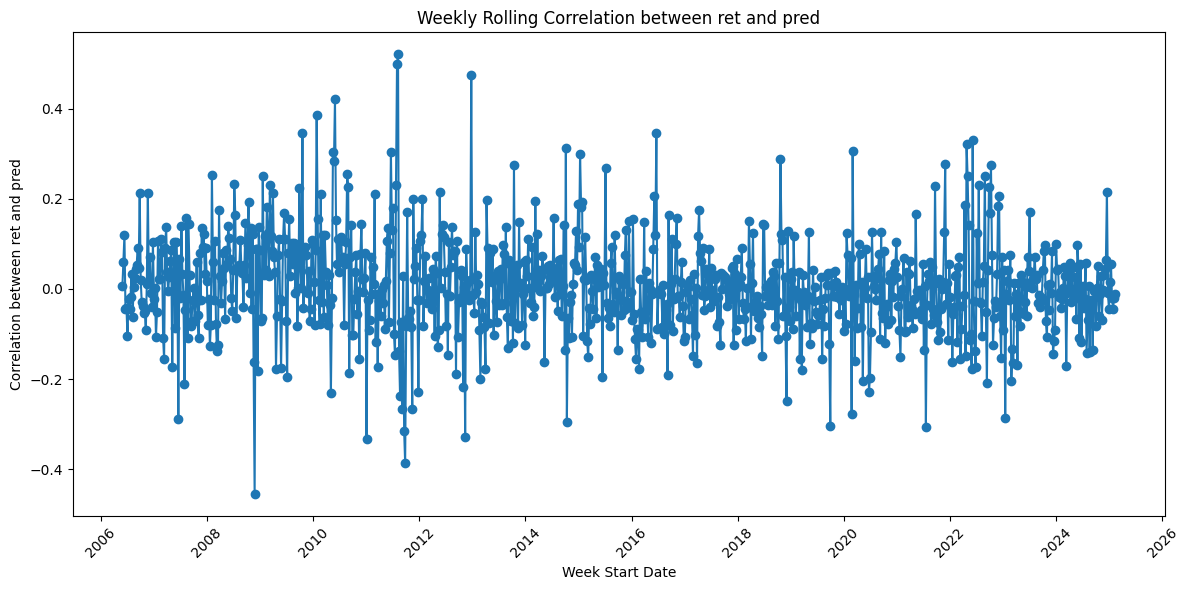

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure date is datetime and sort by date
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df = filtered_df.sort_values('date').copy()

# Create a week identifier column as a period string for grouping
filtered_df['week'] = filtered_df['date'].dt.to_period('W').astype(str)

# Group by week and compute correlation for each group
weekly_corr = filtered_df.groupby('week').apply(lambda g: g['ret'].corr(g['pred']))

# Convert the resulting Series to a DataFrame and reset index
weekly_corr_df = weekly_corr.reset_index(name='rolling_corr')

# Convert week strings back to Period objects and then get the start time for plotting
weekly_corr_df['week_start'] = weekly_corr_df['week'].apply(lambda x: pd.Period(x, freq='W').start_time)

# Plot the weekly correlation as a line chart
plt.figure(figsize=(12, 6))
plt.plot(weekly_corr_df['week_start'], weekly_corr_df['rolling_corr'], marker='o', linestyle='-')
plt.xlabel("Week Start Date")
plt.ylabel("Correlation between ret and pred")
plt.title("Weekly Rolling Correlation between ret and pred")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/3h/f3f3r4gx24j1yt7f14dfr0cc0000gn/T/ipykernel_52563/2984958298.py:62: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_stats = daily_returns_df.groupby('year').apply(annual_stats).reset_index()


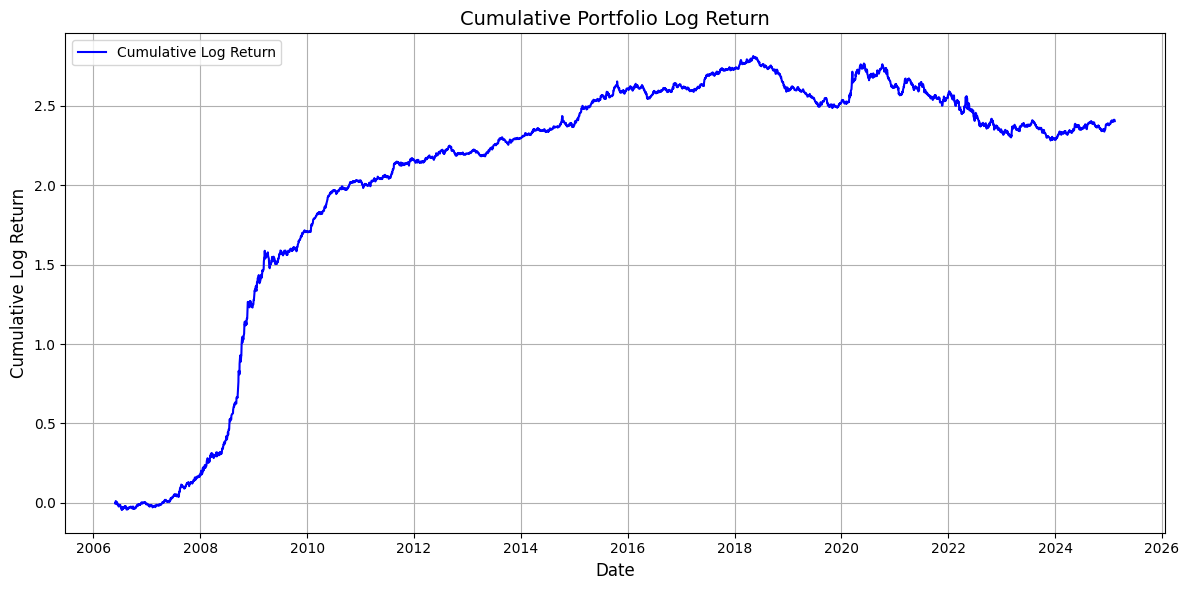

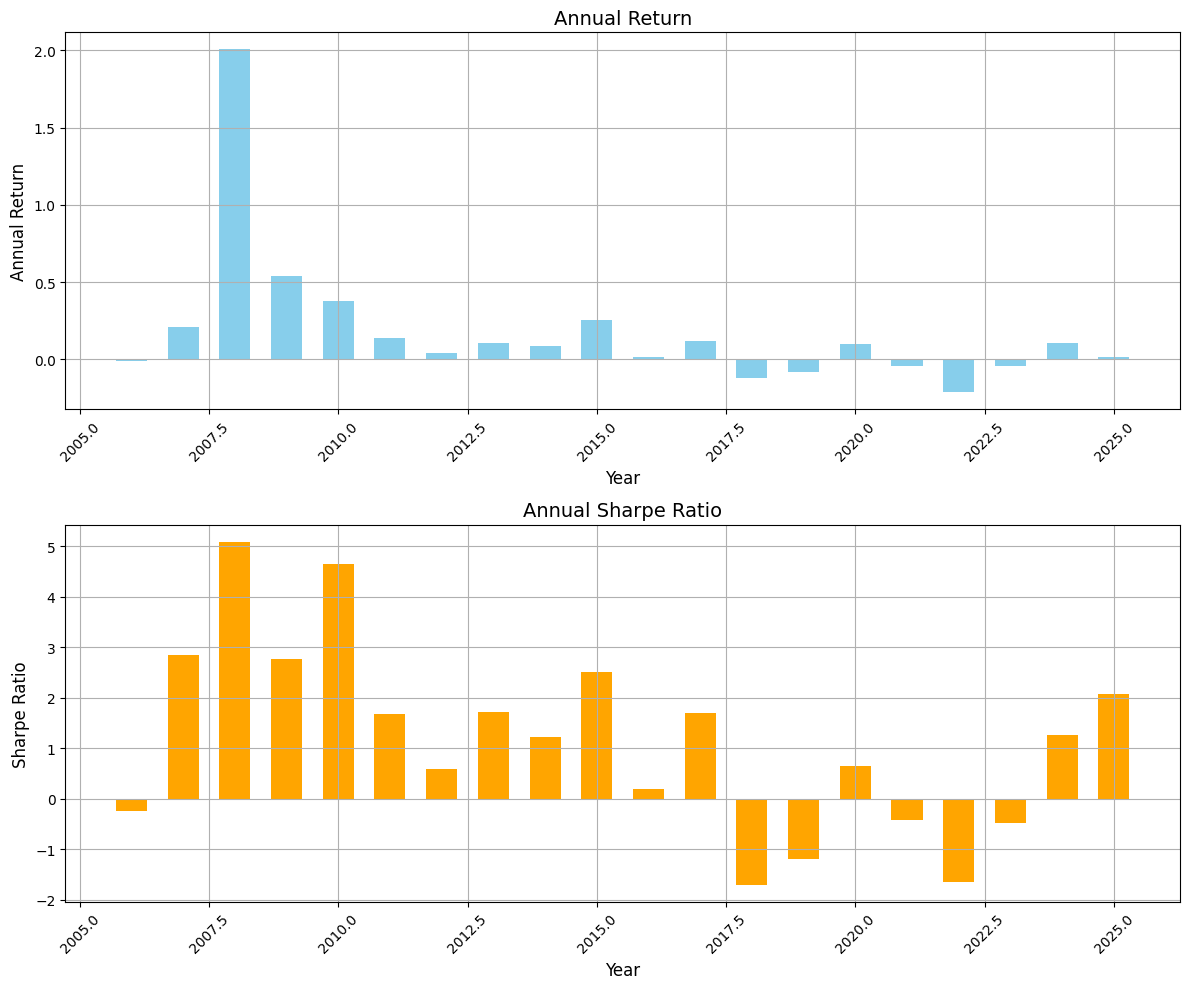

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Preprocessing & Sorting
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df = filtered_df.sort_values('date').copy()

# 2) Backtest: daily selection of top 50 & bottom 50 by 'pred'
daily_returns = []
unique_days = np.sort(filtered_df['date'].unique())

for day in unique_days:
    day_data = filtered_df[filtered_df['date'] == day]
    
    # Skip if fewer than 100 stocks
    if len(day_data) < 100:
        continue
    
    # Sort by 'pred' descending
    day_data_sorted = day_data.sort_values('pred', ascending=False)
    
    # Top 50 for long, bottom 50 for short
    long_data = day_data_sorted.head(50)
    short_data = day_data_sorted.tail(50)
    
    # Log returns for long positions
    long_return = long_data['future_log_ret'].mean()
    # Negative log returns for short positions
    short_return = (-short_data['future_log_ret']).mean()
    
    # Sum for daily portfolio return (log returns)
    portfolio_return = long_return + short_return
    
    daily_returns.append({'date': day, 'portfolio_return': portfolio_return})

# 3) Convert to DataFrame, compute cumulative log returns
daily_returns_df = pd.DataFrame(daily_returns).sort_values('date')
daily_returns_df['cum_log_return'] = daily_returns_df['portfolio_return'].cumsum()

# 4) Compute yearly stats: annual return & annual Sharpe ratio
daily_returns_df['year'] = daily_returns_df['date'].dt.year

def annual_stats(group):
    # Sum of daily log returns for the year
    yearly_log_ret = group['portfolio_return'].sum()
    # Convert log return sum to a percentage return: e^(sum) - 1
    annual_return = np.exp(yearly_log_ret) - 1
    
    # Daily mean and std
    mean_d = group['portfolio_return'].mean()
    std_d = group['portfolio_return'].std()
    
    # Sharpe ratio (risk-free rate = 0), ~252 trading days/year
    if std_d == 0:
        sharpe = np.nan
    else:
        sharpe = (mean_d * 252) / (std_d * np.sqrt(252))
    
    return pd.Series({'annual_return': annual_return, 'sharpe': sharpe})

yearly_stats = daily_returns_df.groupby('year').apply(annual_stats).reset_index()

# -------- Plot 1: Cumulative Log Return --------
fig1, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_returns_df['date'], daily_returns_df['cum_log_return'],
         linestyle='-', color='blue', label='Cumulative Log Return')
ax1.set_title('Cumulative Portfolio Log Return', fontsize=14)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Cumulative Log Return', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True)

plt.tight_layout()
plt.show()

# -------- Plot 2: Annual Return & Annual Sharpe Ratio in separate subplots --------
fig2, (ax2, ax3) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# (A) Annual Return
ax2.bar(yearly_stats['year'], yearly_stats['annual_return'], color='skyblue', width=0.6)
ax2.set_title('Annual Return', fontsize=14)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Annual Return', fontsize=12)
ax2.grid(True)
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)

# (B) Annual Sharpe Ratio
ax3.bar(yearly_stats['year'], yearly_stats['sharpe'], color='orange', width=0.6)
ax3.set_title('Annual Sharpe Ratio', fontsize=14)
ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('Sharpe Ratio', fontsize=12)
ax3.grid(True)
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
plt.show()